In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('valid.csv')


In [3]:
df.head()


,Statement,Label
0,We have less Americans working now than in the...,FALSE
1,"When Obama was sworn into office, he DID NOT u...",FALSE
2,Says Having organizations parading as being so...,FALSE
3,Says nearly half of Oregons children are poor.,TRUE
4,On attacks by Republicans that various program...,TRUE


In [4]:
df.shape


(2571, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


###Pre-Processing


In [6]:
df.isna().sum()


Statement    0
Label        2
dtype: int64

In [7]:
#Deleting thee null values
df=df.dropna()

###Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

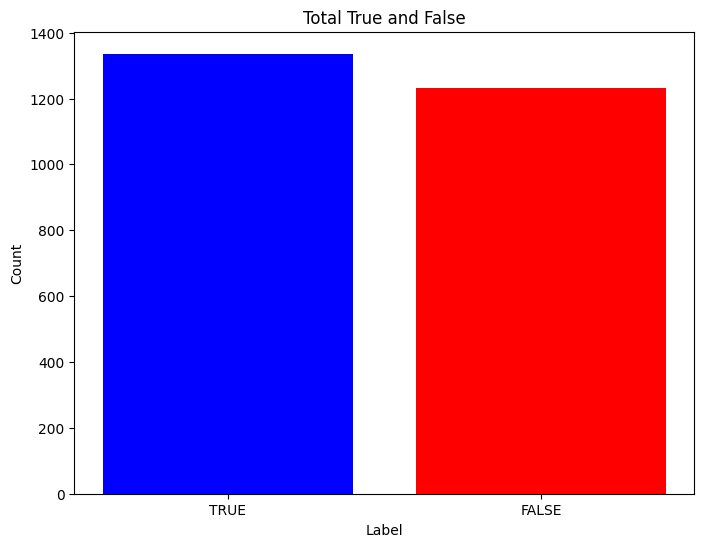

In [9]:
# Count true and false values
true_count = df['Label'].value_counts()['TRUE']
false_count = df['Label'].value_counts()['FALSE']
# Create bar graph
plt.figure(figsize=(8, 6))
plt.bar(['TRUE', 'FALSE'], [true_count, false_count], color=['blue', 'red'])
plt.title('Total True and False')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

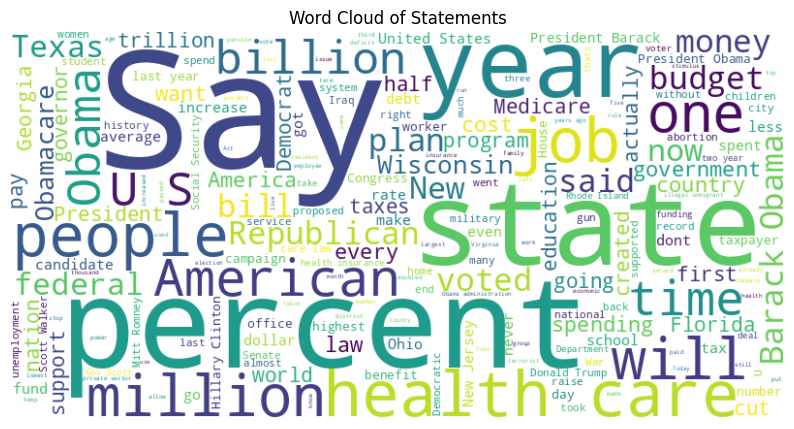

In [10]:
# Word cloud to visualize the most common words in statements
from wordcloud import WordCloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Statement']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Statements')
plt.axis('off')
plt.show()

###Predicting the Model

In [11]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['Statement'], df['Label'], test_size=0.2, random_state=7)

In [13]:
#Initializing a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [14]:
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [15]:
#Initializing a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [16]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.94%


In [17]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FALSE','TRUE'])

array([[229,   8],
       [ 18, 259]])